Number of vertical posts in the image: 10


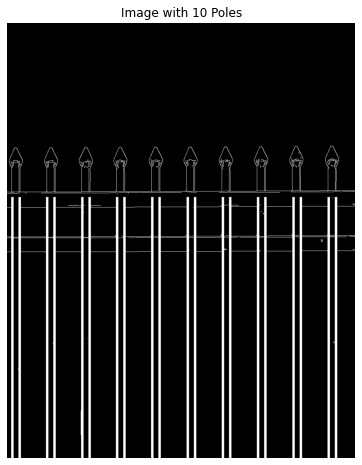

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def count_posts(edge_image, min_pixels=100, min_col_width=7):
    lines = 0                   #lines is set to 0 to count the number of vertical lines found in the image
    col = 0                     #col is used to iterate over columns of the edge_image
    h = int(len(edge_image[0])) #height of the image
    w = int(len(edge_image[1])) #width of th image

    image_with_lines = edge_image.copy()  

    while col < w:
        col_pixels = int(np.sum(edge_image[:, col]) / 255) #calculates the number of white pixels in the current column
        
        if col_pixels > min_pixels:  #If True: Detect as a vertical line 
            lines += 1               #Increase the vertical line count

            #Draw a thicker line to show the vertical line in the edge image
            col_start = col
            col_end = col + min_col_width
            image_with_lines[500:1250, col_start:col_end] = 255  # Set the pixels to white for the line

            col += min_col_width  #By incrementing col by min_col_width, the code skips over the width of the detected line before continuing to search for the next line.


        col += 1 #increment col by 1 if the current column is not a post

    posts = int(lines/2) #a post consists of two lines
    return posts, image_with_lines

# Example usage:
# Load an example image and create an edge image (you may have your own edge detection process)
image = cv2.imread('fence.jpg', cv2.IMREAD_GRAYSCALE)
edge_image = cv2.Canny(image, 100, 200)

# Call the modified function to count lines and draw lines on the image
posts_count, image_with_lines = count_posts(edge_image)

# Display the result
print(f'Number of vertical posts in the image: {posts_count}')

# Display the image with drawn lines using plt.imshow
plt.figure(figsize=(8, 8))
plt.imshow(image_with_lines, cmap='gray')
plt.title(f'Image with {posts_count} Poles')
plt.axis('off')
plt.show()
